# 0. Before the code

## 0.1 Dataset Details

H-1B Visa Petitions 2011-2016

Content:
  This dataset contains five year's worth of H-1B petition data, with approximately 3 million records overall. The columns in the dataset include case status, employer name, worksite coordinates, job title, prevailing wage, occupation code, and year filed.

Columns:
- CASE_STATUS -> The CASE_STATUS field denotes the status of the application after LCA processing. Certified applications are filed with USCIS for H-1B approval. CASE_STATUS: CERTIFIED does not mean the applicant got his/her H-1B visa approved, it just means that he/she is eligible to file an H-1B.     
- EMPLOYER_NAME -> Name of the employer submitting labor condition application.
- SOC_NAME -> Occupational name associated with the 
- JOB_TITLE -> Title of the job.
- FULL_TIME_POSITIONY -> F = Full Time Position; N = Part Time Position.
- PREVAILING_WAGE -> Prevailing Wage for the job being requested for temporary labor condition. The wage is listed at annual scale in USD. The prevailing wage for a job position is defined as the average wage paid to similarly employed workers in the requested occupation in the area of intended employment. The prevailing wage is based on the employer’s minimum requirements for the position.
- YEAR -> Year in which the H-1B visa petition was filed.
- lon -> Longitude
- lat -> latitude


## 0.2 Goals

Analysis:
- H1-B Petition per year
- What are the top 10 jobs for H-1B applicants?
- Which companies use H-1B the most ？
- Wage distribution for H-1B applicants 
- Top 10 cities for H-1B visa holder

Predictions:
- Predict the case status of H1B applicants


## 0.3 Contents

```
1. Load and pre-processing data
    1.1 Import data
    1.2 Sort the data by the year   
    1.3 Review data and drop columns/rows
    1.4 Data Impute
2. Analysis
    2.1 H1-B Petition per year
    2.2 What are the top 10 jobs for H-1B applicants?
    2.3 which companies use H-1B the most ？
    2.4 wage distribution for H-1B applicants 
    2.5 Top 10 cities for H-1B visa holder
3. H-1B Case Status prediction (Classifier)
    3.1 Prepare for prediction 
        3.1.1 Keep Good Ratio for Target Column
        3.1.2 Encoding categorical features
        3.1.3 Split Target Columns
        3.1.4 Standard Scaler
        3.1.5 Split Train, validation
        3.1.6 Feature Selection
    3.2 Model Selection
        3.2.1 Function definition
        3.2.2 Random Forest Classifier
            3.2.2.1 Random Forest Grid Search
            3.2.2.2 Apply to Random Forest model
            3.2.2.3 Random Forest Outcome
        3.2.3 Gradient Boosting Classifier
            3.2.3.1 Gradient Boosting Grid Search
            3.2.3.2 Apply to Gradient Boosting model
            3.2.3.3 Gradient Boosting Outcome
        3.2.4 Deep Neural Network
            3.2.4.1 Apply to Deep Learning Model
            3.2.4.2 Deep Learning Outcome   
4. Test
    4.1 Data pre-processing
    4.2 Model test  
        4.2.1 Random Forest Classifier
        4.2.2 Gradient Boosting Classifier
        4.2.3 Deep Neural Network
        4.2.4 Model Compare
![image.png](attachment:image.png)


```

question for meeting today:

- which is the best for that dataset, and do we need to combine them (ensemble -> (gradient boosting, bagging))
- about the year, should we sort the year or not 
- Name:, should convert into 
- what is the data size we need to choose
- will we learn some new algorithm could also be applied to this prediction
- train, valid, test split

# 1. Load and pre-processing data

##    1.1 Import data

In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,accuracy_score,matthews_corrcoef,f1_score
from sklearn.externals import joblib
import joblib
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

//anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
%ls

6105-final-project-document.docx
Final Presentation-PM2.5 Based Air Quality Index Prediction and Insights Sharing.pptx
INFO6105-Final-Project.pptx
Project DNN-Multiclass.ipynb
Project DNN.ipynb
final-project-H-1B-Visa-Petitions-2011-2016.ipynb
h1b_kaggle.csv
model/
ppt-outline.docx


In [3]:
my_path = %pwd
my_df=pd.read_csv(f'{my_path}/h1b_kaggle.csv')

In [4]:
my_df.shape

(3002458, 11)

## 1.2 Sort the data by the year

In [5]:
my_df.sort_values(by = "YEAR",inplace = True)
my_df.head(5)

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
3002444,3002445,WITHDRAWN,LARSEN & TOUBRO LIMITED,Commercial and Industrial Designers,DESIGN ENGINEER,Y,59800.0,2011.0,"CHELMSFORD, MASSACHUSETTS",-71.367284,42.599814
2763260,2763261,CERTIFIED,INTEL CORPORATION,Industrial Engineers,YIELD ENGINEER,Y,82181.0,2011.0,"HILLSBORO, OREGON",-122.989827,45.522894
2763261,2763262,CERTIFIED,DELOITTE & TOUCHE LLP,"Computer Software Engineers, Applications",ERS CONSULTANT,Y,54579.0,2011.0,"INDIANAPOLIS, INDIANA",-86.158068,39.768403
2763262,2763263,CERTIFIED,APPLE INC.,General and Operations Managers,WW SUPPLY DEMAND PLANNER,Y,73965.0,2011.0,"CUPERTINO, CALIFORNIA",-122.032182,37.322998
2763263,2763264,CERTIFIED,QUALCOMM INCORPORATED,"Computer Software Engineers, Applications",STAFF SOFTWARE ENGINEER,Y,95597.0,2011.0,"SAN DIEGO, CALIFORNIA",-117.161084,32.715738


##    1.3 Review data and drop columns

In [6]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3002458 entries, 3002444 to 3002457
Data columns (total 11 columns):
Unnamed: 0            int64
CASE_STATUS           object
EMPLOYER_NAME         object
SOC_NAME              object
JOB_TITLE             object
FULL_TIME_POSITION    object
PREVAILING_WAGE       float64
YEAR                  float64
WORKSITE              object
lon                   float64
lat                   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 274.9+ MB


In [7]:
my_df.head(5)

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
3002444,3002445,WITHDRAWN,LARSEN & TOUBRO LIMITED,Commercial and Industrial Designers,DESIGN ENGINEER,Y,59800.0,2011.0,"CHELMSFORD, MASSACHUSETTS",-71.367284,42.599814
2763260,2763261,CERTIFIED,INTEL CORPORATION,Industrial Engineers,YIELD ENGINEER,Y,82181.0,2011.0,"HILLSBORO, OREGON",-122.989827,45.522894
2763261,2763262,CERTIFIED,DELOITTE & TOUCHE LLP,"Computer Software Engineers, Applications",ERS CONSULTANT,Y,54579.0,2011.0,"INDIANAPOLIS, INDIANA",-86.158068,39.768403
2763262,2763263,CERTIFIED,APPLE INC.,General and Operations Managers,WW SUPPLY DEMAND PLANNER,Y,73965.0,2011.0,"CUPERTINO, CALIFORNIA",-122.032182,37.322998
2763263,2763264,CERTIFIED,QUALCOMM INCORPORATED,"Computer Software Engineers, Applications",STAFF SOFTWARE ENGINEER,Y,95597.0,2011.0,"SAN DIEGO, CALIFORNIA",-117.161084,32.715738


In [8]:
case_status = my_df['CASE_STATUS'].value_counts()
print('\n Case Status:\n\n', case_status.head(10))


 Case Status:

 CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64


In [9]:
# drop rows "PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED ", "INVALIDATED" and "REJECTED"
my_df = my_df.loc[my_df['CASE_STATUS'].isin(["CERTIFIED", "DENIED"])]
case_status = my_df['CASE_STATUS'].value_counts()
print('\n after filting Case Status:\n\n', case_status.head(10))


 after filting Case Status:

 CERTIFIED    2615623
DENIED         94346
Name: CASE_STATUS, dtype: int64


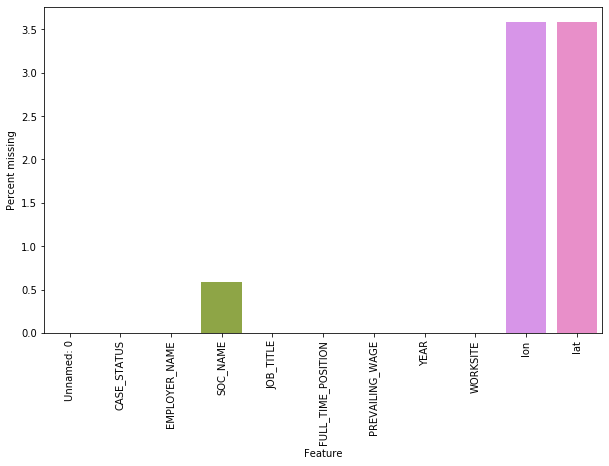

In [10]:
null_vals = my_df.isnull().sum() / len(my_df) * 100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (10,6))
plt.xticks(rotation=90)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)

In [11]:
my_df = my_df.drop("Unnamed: 0",axis = 1)
my_df.isnull().sum()

CASE_STATUS               0
EMPLOYER_NAME            18
SOC_NAME              15893
JOB_TITLE                10
FULL_TIME_POSITION        1
PREVAILING_WAGE          53
YEAR                      0
WORKSITE                  0
lon                   97071
lat                   97071
dtype: int64

In [12]:
my_df = my_df.dropna(subset = ['CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE', 'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE'])
my_df.isnull().sum()

CASE_STATUS               0
EMPLOYER_NAME             0
SOC_NAME                  0
JOB_TITLE                 0
FULL_TIME_POSITION        0
PREVAILING_WAGE           0
YEAR                      0
WORKSITE                  0
lon                   96727
lat                   96727
dtype: int64

In [13]:
# top 10 work-site
worksite = my_df['WORKSITE'].value_counts()
print('\n Top 10 Number of applications by worksite:\n\n', worksite.head(10))


 Top 10 Number of applications by worksite:

 NEW YORK, NEW YORK           170835
HOUSTON, TEXAS                73667
SAN FRANCISCO, CALIFORNIA     55816
ATLANTA, GEORGIA              47756
CHICAGO, ILLINOIS             46464
SAN JOSE, CALIFORNIA          44917
SUNNYVALE, CALIFORNIA         30653
DALLAS, TEXAS                 28556
CHARLOTTE, NORTH CAROLINA     28345
BOSTON, MASSACHUSETTS         27653
Name: WORKSITE, dtype: int64


In [14]:
my_df = my_df[(my_df['PREVAILING_WAGE'] < 150000)]

##    1.4 Data Impute

In [15]:
# impute the longitude and the latitude
from pandas.api.types import is_numeric_dtype

def mydf_imputer(my_df, feature, null_status):
    if is_numeric_dtype(feature):
        if pd.isnull(feature).sum():
            filler = feature.median()
            my_df[null_status] = feature.fillna(filler)

for p,q in my_df.items(): 
    mydf_imputer(my_df, q, p)
my_df.isnull().sum()

CASE_STATUS           0
EMPLOYER_NAME         0
SOC_NAME              0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
YEAR                  0
WORKSITE              0
lon                   0
lat                   0
dtype: int64

In [16]:
my_df.head(5)

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
2763260,CERTIFIED,INTEL CORPORATION,Industrial Engineers,YIELD ENGINEER,Y,82181.0,2011.0,"HILLSBORO, OREGON",-122.989827,45.522894
2763261,CERTIFIED,DELOITTE & TOUCHE LLP,"Computer Software Engineers, Applications",ERS CONSULTANT,Y,54579.0,2011.0,"INDIANAPOLIS, INDIANA",-86.158068,39.768403
2763262,CERTIFIED,APPLE INC.,General and Operations Managers,WW SUPPLY DEMAND PLANNER,Y,73965.0,2011.0,"CUPERTINO, CALIFORNIA",-122.032182,37.322998
2763263,CERTIFIED,QUALCOMM INCORPORATED,"Computer Software Engineers, Applications",STAFF SOFTWARE ENGINEER,Y,95597.0,2011.0,"SAN DIEGO, CALIFORNIA",-117.161084,32.715738
2763264,CERTIFIED,"HILLCREST EDUCATIONAL CENTERS, INC.",Rehabilitation Counselors,CASE SPECIALIST,Y,22568.0,2011.0,"PITTSFIELD, MASSACHUSETTS",-73.245382,42.450084


# 2. Analysis

##  2.1 H1-B Petition per year

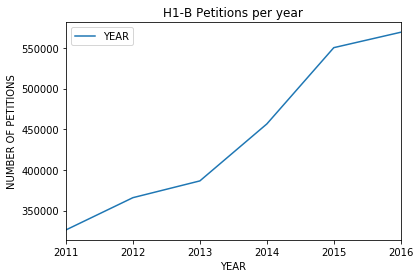

In [17]:
# year
df_plot_petitions_year = pd.DataFrame(my_df['YEAR'].value_counts())
df_plot_petitions_year = df_plot_petitions_year.sort_values(['YEAR'])
plot_status_year = df_plot_petitions_year.plot(title = 'H1-B Petitions per year', kind = 'line')
plot_status_year.set_xlabel('YEAR')
plot_status_year.set_ylabel('NUMBER OF PETITIONS')
plt.show()

## 2.2 What are the top 10 jobs for H-1B applicants ?

In [18]:
# job title
job_title = my_df['JOB_TITLE'].value_counts()
print('\nNumber of applications grouped by job title:\n\n', job_title.head(10))


Number of applications grouped by job title:

 PROGRAMMER ANALYST          224854
SOFTWARE ENGINEER           104218
COMPUTER PROGRAMMER          64804
SYSTEMS ANALYST              56487
SOFTWARE DEVELOPER           38611
BUSINESS ANALYST             35837
COMPUTER SYSTEMS ANALYST     31974
TECHNOLOGY LEAD - US         28309
TECHNOLOGY ANALYST - US      26008
SENIOR SOFTWARE ENGINEER     23634
Name: JOB_TITLE, dtype: int64


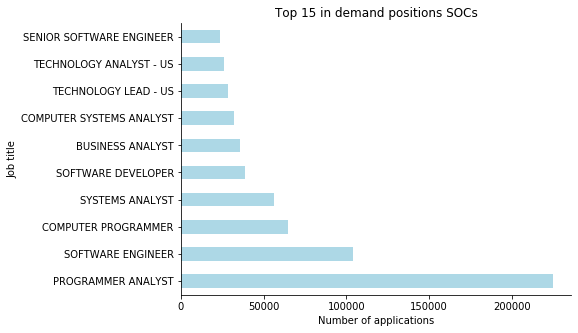

In [19]:
plot_top_job_title = job_title.head(10).plot.barh(title = "Top 15 in demand positions SOCs", color = 'lightblue', figsize = (7, 5))
plot_top_job_title.set_ylabel("Job title")
plot_top_job_title.set_xlabel('Number of applications')
plot_top_job_title.spines['top'].set_visible(False)
plot_top_job_title.spines['right'].set_visible(False)

## 2.3 which companies use H-1B the most ？

In [20]:
# top 10 company use H-1B
top_company = my_df['EMPLOYER_NAME'].value_counts()
print('\nNumber of applications grouped by company name:\n\n', top_company.head(10))


Number of applications grouped by company name:

 INFOSYS LIMITED                      130178
TATA CONSULTANCY SERVICES LIMITED     64347
WIPRO LIMITED                         41699
DELOITTE CONSULTING LLP               36626
ACCENTURE LLP                         32880
IBM INDIA PRIVATE LIMITED             27858
MICROSOFT CORPORATION                 22325
HCL AMERICA, INC.                     22298
ERNST & YOUNG U.S. LLP                18194
CAPGEMINI AMERICA INC                 15768
Name: EMPLOYER_NAME, dtype: int64


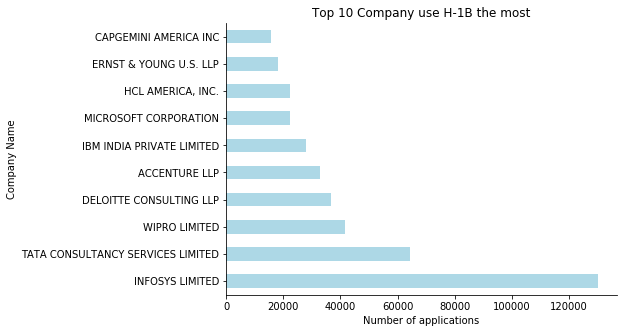

In [21]:
plot_top_company = top_company.head(10).plot.barh(title = "Top 10 Company use H-1B the most", color = 'lightblue', figsize = (7, 5))
plot_top_company.set_ylabel("Company Name")
plot_top_company.set_xlabel('Number of applications')
plot_top_company.spines['top'].set_visible(False)
plot_top_company.spines['right'].set_visible(False)

## 2.4 wage distribution for H-1B applicants 

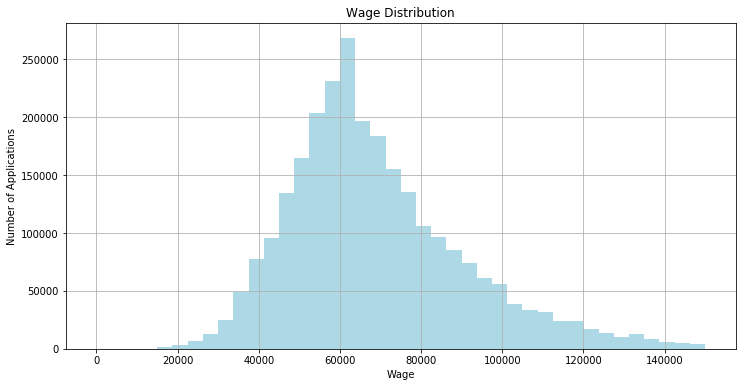

In [22]:
# wage distribution
plt.figure(figsize=(12,6))
my_df[my_df['PREVAILING_WAGE']<150000].PREVAILING_WAGE.hist(bins=40,color='lightblue')
plt.title('Wage Distribution')
plt.ylabel("Number of Applications")
plt.xlabel('Wage')
plt.show()

## 2.5 Top 10 cities for H-1B visa holder

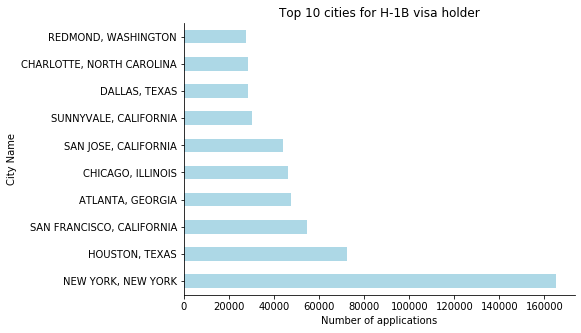

In [23]:
top_city = my_df['WORKSITE'].value_counts()
plot_top_company = top_city.head(10).plot.barh(title = "Top 10 cities for H-1B visa holder", color = 'lightblue', figsize = (7, 5))
plot_top_company.set_ylabel("City Name")
plot_top_company.set_xlabel('Number of applications')
plot_top_company.spines['top'].set_visible(False)
plot_top_company.spines['right'].set_visible(False)

# 3. H-1B Case Status prediction (Classifier)

## 3.1 Prepare for prediction 

### 3.1.1 Keep Good Ratio for Target Column

In [24]:
# drop off some 'CERTIFIED' rows, keep a good ratio between 'CERTIFIED' and 'DENIED'
my_df = my_df.loc[my_df['CASE_STATUS'].isin(["CERTIFIED", "DENIED"])]
case_status = my_df['CASE_STATUS'].value_counts()
print('\n after filting Case Status:\n\n', case_status.head(10))


 after filting Case Status:

 CERTIFIED    2565781
DENIED         88977
Name: CASE_STATUS, dtype: int64


In [25]:

from sklearn.model_selection import train_test_split
my_df_certified = my_df[my_df['CASE_STATUS'] == 'CERTIFIED']
my_df_denied = my_df[my_df['CASE_STATUS'] == 'DENIED']

my_df_certified_keep, my_df_certified_drop = train_test_split(my_df_certified, train_size= 0.03, random_state=123)
my_df = my_df_certified_keep.append(my_df_denied)
my_df.sort_values(by = "YEAR",inplace = True)
my_df.head(10)

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
2792133,DENIED,NETLINE CORPORATION,"Computer Software Engineers, Applications",SOFTWARE ENGINEER,Y,77218.0,2011.0,"LOS GATOS, CALIFORNIA",-121.962375,37.235808
2942790,DENIED,"RIIS, L.L.C.","Software Developers, Applications",PHONE SOFTWARE DEVELOPER,Y,69805.0,2011.0,"SOUTHFIELD, MICHIGAN",-83.221873,42.473369
2942786,DENIED,"CHILDREN'S HOSPITAL PEDIATRIC ASSOCIATES, INC.","Physicians and Surgeons, All Other",NEONATOLOGIST,Y,106642.0,2011.0,"BOSTON, MASSACHUSETTS",-71.058880,42.360083
2942782,DENIED,INTEL CORPORATION,"Electronics Engineers, Except Computer",COMPONENT DESIGN ENGINEER,Y,77369.0,2011.0,"DUPONT, WASHINGTON",-122.644789,47.100322
2942751,DENIED,CAPGEMINI FINANCIAL SERVICES USA INC,Computer and Information Systems Managers,MANAGER,Y,82014.0,2011.0,"DETROIT, MICHIGAN",-83.045754,42.331427
2942730,DENIED,"OKLAHOMA HEART HOSPITAL, LLC","Business Operations Specialists, All Other*",BUSINESS OFFICE ANALYST,Y,48069.0,2011.0,"OKLAHOMA CITY, OKLAHOMA",-97.516428,35.467560
2942745,DENIED,THE DANBURY HOSPITAL,"Physicians and Surgeons, All Other",RESIDENT PHYSICIAN,Y,50621.0,2011.0,"DANBURY, CONNECTICUT",-73.454011,41.394817
2942743,DENIED,MATULEWICZ AND ASSOCIATES PC,Management Analysts,13-1111,Y,43805.0,2011.0,"MCALLEN, TEXAS",-98.230012,26.203407
2942733,DENIED,"N & N ORCHIDS, INC.",Financial Analysts,CONTROLLER,N,48110.4,2011.0,"DORAL, FLORIDA",-80.355330,25.819542
2957885,CERTIFIED,"TECH MAHINDRA (AMERICAS), INC.",Computer Systems Analysts,PROGRAMMER ANALYST,Y,51854.0,2011.0,"FARMERS BRANCH, TEXAS",-96.896115,32.926514


In [26]:
my_df = my_df.loc[my_df['CASE_STATUS'].isin(["CERTIFIED", "DENIED"])]
case_status = my_df['CASE_STATUS'].value_counts()
print('\n after filting Case Status:\n\n', case_status.head(10))


 after filting Case Status:

 DENIED       88977
CERTIFIED    76973
Name: CASE_STATUS, dtype: int64


### 3.1.2 Encoding catagorical features

In [27]:
from pandas.api.types import is_string_dtype,is_numeric_dtype

def str_to_cat(my_df):
    for p,q in my_df.items():
        if is_string_dtype(q):
            my_df[p] = q.astype('category').cat.as_ordered()
    return my_df


my_df = str_to_cat(my_df)

def mydf_to_nums(my_df, feature, null_status):
    if not is_numeric_dtype(feature):
        my_df[null_status] = feature.cat.codes
        
for p,q in my_df.items(): 
        mydf_to_nums(my_df, q, p)

### 3.1.3 StandardScaler

In [28]:

# X_cat -> catagorical, X_con -> continuous
df_cat = my_df[['CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE', 'FULL_TIME_POSITION', 'WORKSITE']]
df_con = my_df.drop(df_cat,axis = 1)

In [29]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df_con)
df_con_sc = pd.DataFrame(scaler.transform(df_con))
df_con_sc.columns = ['PREVAILING_WAGE', 'YEAR', 'lon', 'lat']

df_cat.reset_index(inplace = True,drop = False)
df_cat.drop("index",inplace = True,axis = 1)
df_list = [df_cat,df_con_sc]
df_full = pd.concat(df_list,axis = 1)
df_full.head(5)

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,WORKSITE,PREVAILING_WAGE,YEAR,lon,lat
0,1,40827,323,33001,1,3854,0.515681,-1.298782,-1.365938,-0.119281
1,1,49548,1258,23113,1,6355,0.192712,-1.298782,0.336636,0.949353
2,1,11837,1065,21463,1,761,1.797623,-1.298782,0.871178,0.926239
3,1,29193,488,6975,1,1860,0.522260,-1.298782,-1.395929,1.893402
4,1,10322,341,18733,1,1761,0.724633,-1.298782,0.344376,0.920392


### 3.1.3 Split Target Columns

In [30]:
X = df_full.iloc[:, 1:]
Y = df_full.iloc[:, 0]

### 3.1.5 Split Train, validation, test dataset

In [31]:
case_status = my_df['CASE_STATUS'].value_counts()
print('\n after filting Case Status:\n\n', case_status.head(10))


 after filting Case Status:

 1    88977
0    76973
Name: CASE_STATUS, dtype: int64


In [32]:
from sklearn.model_selection import train_test_split


def split_data(my_df):
    border = int(len(my_df) * 0.85)
    return my_df[:border].copy(), my_df[border:]

x_train_total, x_test = train_test_split(X, train_size= 0.85, random_state=123)
y_train_total, y_test = train_test_split(Y, train_size= 0.85, random_state=123)


x_train, x_val = train_test_split(x_train_total, train_size= 0.85, random_state=123)
y_train, y_val = train_test_split(y_train_total, train_size= 0.85, random_state=123)

In [33]:
y_val.value_counts()

1    11262
0     9897
Name: CASE_STATUS, dtype: int64

### 3.1.6 Feature Selection

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

clf = RandomForestClassifier()
clf = clf.fit(x_train, y_train)
clf.feature_importances_

array([0.16373123, 0.11606047, 0.15404433, 0.00964893, 0.09808762,
       0.16471352, 0.09992268, 0.09606588, 0.09772534])

In [35]:
model=SelectFromModel(clf,threshold=0.03,prefit=True)
model.transform(x_train)
feature_idx=model.get_support()
feature_name=x_train.columns[feature_idx]
print(feature_name)

Index(['EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE', 'WORKSITE', 'PREVAILING_WAGE',
       'YEAR', 'lon', 'lat'],
      dtype='object')


In [36]:
x_train_fs = x_train[list(feature_name)]
x_val_fs = x_val[list(feature_name)]
x_train_fs.shape, x_val_fs.shape

((119898, 8), (21159, 8))

In [37]:
x_val_fs.shape, y_val.shape

((21159, 8), (21159,))

In [38]:
x_train_fs.shape, y_train.shape

((119898, 8), (119898,))

In [39]:
x_train_fs.info()
x_train_fs.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119898 entries, 162696 to 82326
Data columns (total 8 columns):
EMPLOYER_NAME      119898 non-null int32
SOC_NAME           119898 non-null int16
JOB_TITLE          119898 non-null int32
WORKSITE           119898 non-null int16
PREVAILING_WAGE    119898 non-null float64
YEAR               119898 non-null float64
lon                119898 non-null float64
lat                119898 non-null float64
dtypes: float64(4), int16(2), int32(2)
memory usage: 5.9 MB


,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,WORKSITE,PREVAILING_WAGE,YEAR,lon,lat
162696,56030,236,25080,6340,1.760460,1.519444,-1.385512,-0.033822
95546,30167,332,24081,3231,0.238023,0.392154,-0.266641,-1.021471
93962,54155,1373,39083,895,-0.978132,0.392154,0.744375,0.583075
56312,48443,572,9260,4715,-0.145331,-0.735137,0.741660,0.590136
164199,33093,4,29392,1290,-0.389094,1.519444,0.279937,0.261711


In [40]:
y_train.head(5)


162696    0
95546     1
93962     0
56312     1
164199    0
Name: CASE_STATUS, dtype: int8

## 3.2 Model Selection

### 3.2.1 function definition

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, fbeta_score
import time
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
def roc_plot(y_test, y_test_pred):
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_test_pred)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [42]:
    
def model_evaluate(model, x_test, y_test):
    results = {}
    
    start = time.time()
    
    if (model.__class__.__name__ == 'Sequential'):
        y_test_pred = model.predict_classes(x_test)
    else:
        y_test_pred = model.predict(x_test)
        
    end = time.time()
    results['predict_time'] = end - start
    results['precision_score'] = precision_score(y_test, y_test_pred, average='weighted')
    results['f1_score'] = fbeta_score(y_test, y_test_pred, beta=0.5, average='weighted')
    
    print("precision_score Score: %f\nf1_score: %f" %(results['precision_score'],results['f1_score']))
    
    cf_matrix = confusion_matrix(y_test, y_test_pred)
    plot_confusion_matrix(cf_matrix, 
                      normalize    = False,
                      target_names = ['CERTIFICATED', 'DENIED'],
                      title        = "Confusion Matrix")
    
    roc_plot(y_test, y_test_pred)
    return results

### 3.2.2 Random Forest Classifier

#### 3.2.2.1 Random Forest Grid Search

In [43]:

from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [3, 5],
    'min_samples_leaf': [3, 5],
    'n_estimators': [40, 60, 80, 100],
    'max_features' : ["auto", "log2", "sqrt"],
    'criterion': ["gini", "entropy"]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, n_jobs=-1)
grid_search_rf.fit(x_train_fs, y_train)
print(grid_search_rf.best_score_)
print(grid_search_rf.best_params_)
print(grid_search_rf.best_estimator_)

0.6748402809054362
{'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 40}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


#### 3.2.2.2 Apply to Random Forest model

In [44]:
rf_grid_model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

rf_grid_model.fit(x_train_fs, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### 3.2.2.3 Random Forest Outcome

precision_score Score: 0.677395
f1_score: 0.677423


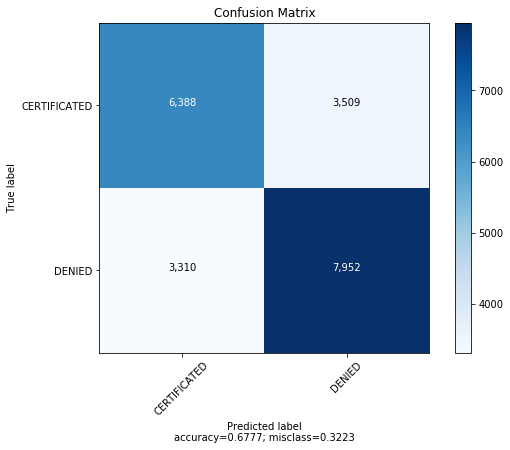

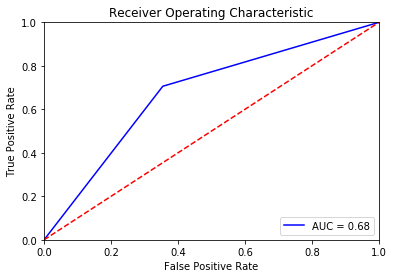

{'predict_time': 0.0885918140411377,
 'precision_score': 0.6773953112510288,
 'f1_score': 0.6774229594345252}

In [45]:
model_evaluate(rf_grid_model, x_val_fs, y_val)

#### 3.2.2.4 Export the model

In [46]:
!mkdir model
rf_grid_model_name = f'{my_path}/model/rf_grid_model.sav'
joblib.dump(rf_grid_model, rf_grid_model_name)

mkdir: model: File exists


['/Users/likunli/Documents/study/graduate/2019-Summer/6105-mac/6105-Project-Group4/model/rf_grid_model.sav']

### 3.2.3 Gradient Boosting Classifier

#### 3.2.3.1 Gradient Boostring Grid Search

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = [
    {
        'learning_rate':[0.15,0.01,0.005], 
        'n_estimators': [40, 60, 80, 100],
        'min_samples_leaf': [20, 50,100,150]
    }
]

grid_search_gb = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=3, n_jobs=-1)
grid_search_gb.fit(x_train_fs, y_train)
print(grid_search_gb.best_score_)
print(grid_search_gb.best_params_)
print(grid_search_gb.best_estimator_)

0.6963585714524012
{'learning_rate': 0.15, 'min_samples_leaf': 100, 'n_estimators': 100}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=100, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


#### 3.2.3.2 Apply to Gradient Boosting model

In [48]:
gb_grid_model = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=100, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

gb_grid_model.fit(x_train_fs, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=100, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

#### 3.2.3.3 Gradient Boostring Outcome

precision_score Score: 0.699537
f1_score: 0.699519


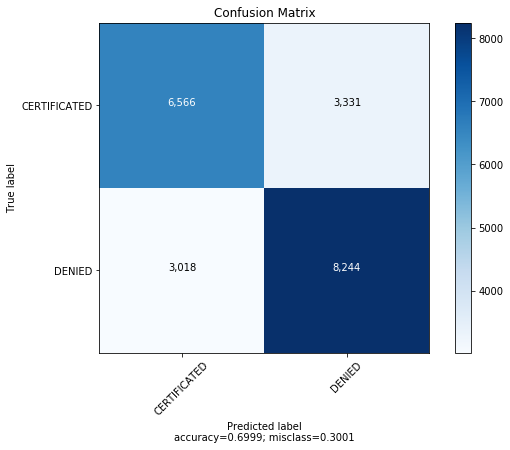

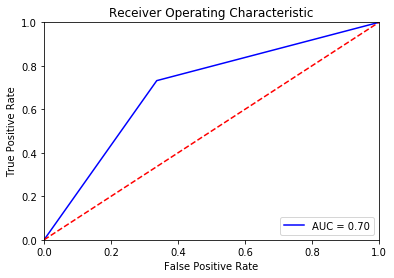

{'predict_time': 0.02198195457458496,
 'precision_score': 0.6995373148805847,
 'f1_score': 0.6995191193990249}

In [49]:
model_evaluate(gb_grid_model, x_val_fs, y_val)

#### 3.2.3.4 Export the model

In [50]:
!mkdir model
gb_grid_model_name = f'{my_path}/model/gb_grid_model.sav'
joblib.dump(gb_grid_model, gb_grid_model_name)

mkdir: model: File exists


['/Users/likunli/Documents/study/graduate/2019-Summer/6105-mac/6105-Project-Group4/model/gb_grid_model.sav']

### 3.2.4 Apply to Deep Learning model

#### 3.2.4.1 Apply to Deep Learning model

In [51]:
from keras.models import Sequential
from keras.layers import Dense
dnn_model = Sequential()
dnn_model.add(Dense(14, input_dim=8, init='uniform', activation='relu'))
dnn_model.add(Dense(8, init='uniform', activation='relu'))
dnn_model.add(Dense(1, init='uniform', activation='sigmoid'))
dnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Using TensorFlow backend.
W0813 00:10:50.205471 4420629952 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0813 00:10:50.214500 4420629952 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0813 00:10:50.215921 4420629952 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0813 00:10:50.238232 4420629952 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0813 00:10:50.250221 4420629952 deprecation_w

#### 3.2.4.2 Deep Learning Outcome 

In [52]:
# model_evaluate(dnn_model, x_val_fs, y_val)

history = dnn_model.fit(x_train_fs, y_train, validation_data=(x_val_fs, y_val), nb_epoch=60, batch_size=200)
train_scores = dnn_model.evaluate(x_val_fs, y_val)
print ("Accuracy: %.2f%%" %(train_scores[1]*100))   


W0813 00:10:50.416205 4420629952 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 119898 samples, validate on 21159 samples
Epoch 1/60
119898/119898 [==============================] - 1s 5us/step - loss: 0.6926 - acc: 0.5352 - val_loss: 0.6884 - val_acc: 0.5323
Epoch 2/60
119898/119898 [==============================] - 0s 4us/step - loss: 0.6878 - acc: 0.5381 - val_loss: 0.6864 - val_acc: 0.5574
Epoch 3/60
119898/119898 [==============================] - 0s 4us/step - loss: 0.6864 - acc: 0.5652 - val_loss: 0.6843 - val_acc: 0.5648
Epoch 4/60
119898/119898 [==============================] - 0s 4us/step - loss: 0.6859 - acc: 0.5653 - val_loss: 0.6858 - val_acc: 0.5632
Epoch 5/60
119898/119898 [==============================] - 0s 4us/step - loss: 0.6839 - acc: 0.5642 - val_loss: 0.6828 - val_acc: 0.5621
Epoch 6/60
119898/119898 [==============================] - 0s 4us/step - loss: 0.6816 - acc: 0.5663 - val_loss: 0.6795 - val_acc: 0.5681
Epoch 7/60
119898/119898 [==============================] - 0s 4us/step - loss: 0.6801 - acc: 0.5701 - val_loss: 0.6821 -

119898/119898 [==============================] - 0s 4us/step - loss: 0.6310 - acc: 0.6433 - val_loss: 0.6350 - val_acc: 0.6412
Epoch 60/60
21159/21159 [==============================] - 0s 6us/step
Accuracy: 63.42%


#### 3.2.4.3 Export the model

In [53]:
!mkdir model
dnn_model_name = f'{my_path}/model/dnn_model.sav'
joblib.dump(dnn_model, dnn_model_name)

mkdir: model: File exists


['/Users/likunli/Documents/study/graduate/2019-Summer/6105-mac/6105-Project-Group4/model/dnn_model.sav']

#### 3.2.4.4 Epoch vs Training and Validation Accuracy

In [54]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

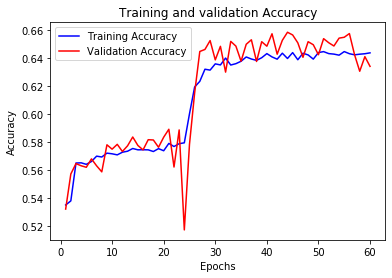

In [55]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)



plt.plot(epochs, acc_values, 'b-',label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b-',label='Validation Accuracy', color='red')
plt.title("Training and validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

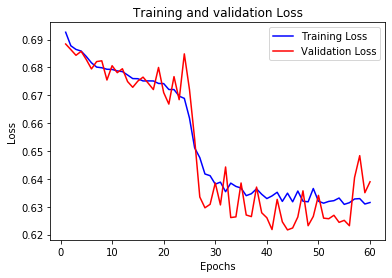

In [56]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc_values) + 1)



plt.plot(epochs, loss_values, 'b-',label='Training Loss')
plt.plot(epochs, val_loss_values, 'b-',label='Validation Loss', color='red')
plt.title("Training and validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

# 4. Test

## 4.1 Model test

### 4.1.1 Import model

In [57]:
!ls model
rf_grid_model_loaded = joblib.load(rf_grid_model_name)
gb_grid_model_loaded = joblib.load(gb_grid_model_name)
dnn_model_loaded = joblib.load(dnn_model_name)

x_test_fs = x_test[list(feature_name)]

dnn_model.sav     gb_grid_model.sav rf_grid_model.sav


In [58]:
x_test_fs.head(5)

,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,WORKSITE,PREVAILING_WAGE,YEAR,lon,lat
22252,14470,799,9110,3579,-0.438926,-1.298782,0.207596,0.261711
123966,21403,937,31888,1979,1.353579,0.955799,0.723810,0.550539
71983,26264,332,7189,1266,-0.266755,-0.171491,0.142916,0.827901
110891,33745,313,7511,2879,0.247085,0.392154,0.799709,0.804559
7608,30608,886,19681,1301,-1.390458,-1.298782,-1.189983,-0.775465


### 4.1.2 Random Forest Classifier

precision_score Score: 0.677315
f1_score: 0.677320


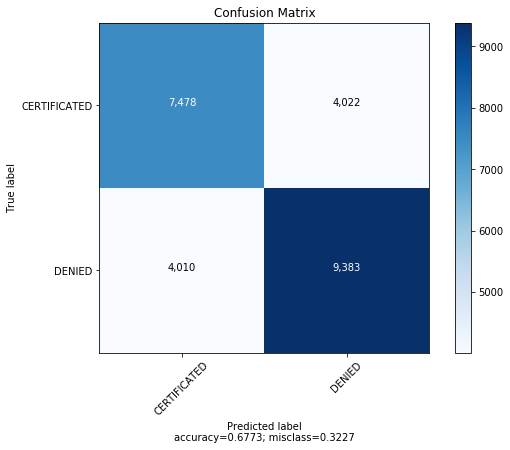

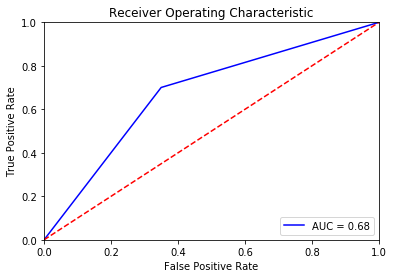

In [59]:
results = {}
model_name = rf_grid_model_loaded.__class__.__name__
results[model_name] = model_evaluate(rf_grid_model_loaded, x_test_fs, y_test)

### 4.1.3 Gradient Boosting Classifier

precision_score Score: 0.700560
f1_score: 0.700588


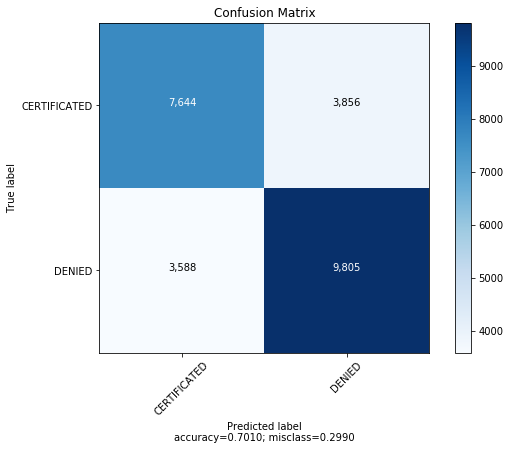

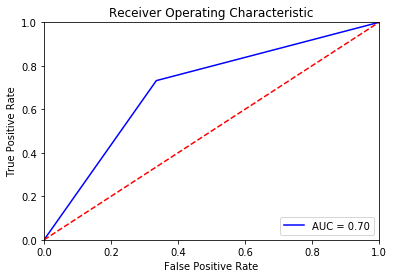

In [60]:
model_name = gb_grid_model_loaded.__class__.__name__
results[model_name] = model_evaluate(gb_grid_model_loaded, x_test_fs, y_test)

### 4.1.4 DNN

precision_score Score: 0.662301
f1_score: 0.639042


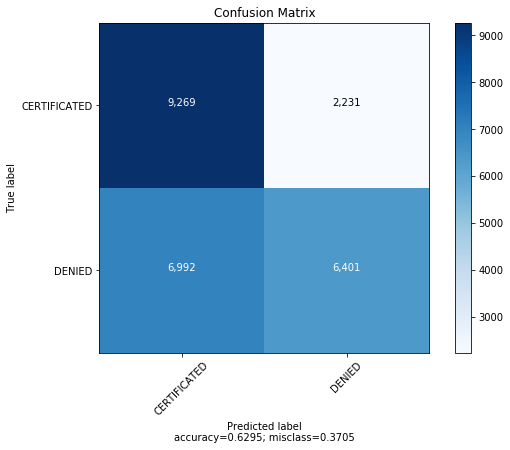

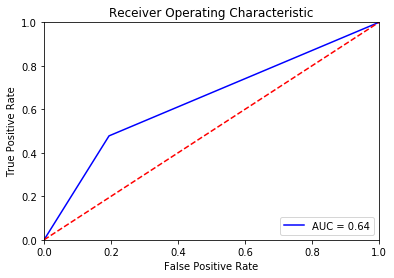

In [61]:
model_name = dnn_model_loaded.__class__.__name__
results[model_name] = model_evaluate(dnn_model_loaded, x_test_fs, y_test)

## 4.2 Model Compare

### 4.2.1 Predicting times

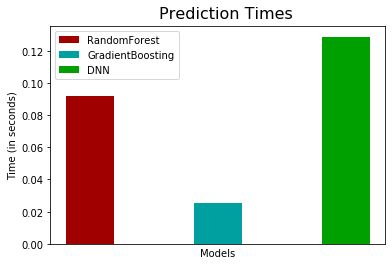

In [62]:
ind = 1
width = 0.4       
plt.xticks(range(0,1)) # Show no bar-labels
plt.xlabel('Models')
plt.ylabel('Time (in seconds)')

for key, data_dict in results.items():
    x = data_dict.keys() 
    y = list(data_dict.values()) #list used for Python3
    if key == 'RandomForestClassifier':
        plt.bar(ind, y[0], color='#A00000', align='center', width = 0.3, label = 'RandomForest') # Prediction 
    elif key == 'GradientBoostingClassifier': 
        plt.bar(ind+width*2, y[0], color='#00A0A0', align='center', width = 0.3,  label = "GradientBoosting") # Prediction 
    elif key == 'Sequential': 
        plt.bar(ind+width*4, y[0], color='#00A000', align='center', width = 0.3, label = "DNN") # Prediction 

#print(results.values())
plt.suptitle("Prediction Times", fontsize = 16, x = 0.53, y = .95)
plt.legend(loc = 'upper left')

### 4.2.2 Precision

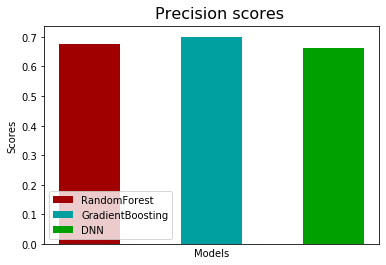

In [63]:
ind = 1
width = 0.4       
plt.xticks(range(0,1)) # Show no bar-labels
plt.xlabel('Models')
plt.ylabel('Scores')

for key, data_dict in results.items():
    if key == 'RandomForestClassifier':
        x = data_dict.keys() 
        y = list(data_dict.values()) #list used for Python3
        plt.bar(ind, y[1], color='#A00000', align='center', width = 0.2, label = 'RandomForest') # y[1] Precision - y[2] F-Score
    elif key == 'GradientBoostingClassifier': 
        x = data_dict.keys() 
        y = list(data_dict.values()) 
        plt.bar(ind+width, y[1], color='#00A0A0', align='center', width = 0.2, label = 'GradientBoosting')  
    elif key == 'Sequential': 
        x = data_dict.keys() 
        y = list(data_dict.values()) 
        plt.bar(ind+width*2, y[1], color='#00A000', align='center', width = 0.2, label = 'DNN')  

# plt.axhline(y = precision, linewidth = 1, color = 'k', linestyle = 'dashed')
plt.suptitle("Precision scores", fontsize = 16, x = 0.53, y = .95)
plt.legend(loc = 'lower left')

### 4.2.3 F-1 score

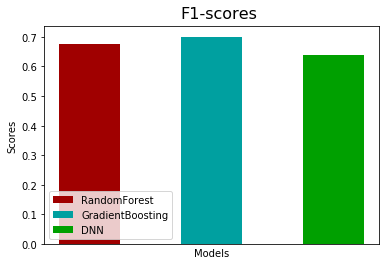

In [64]:
ind = 1
width = 0.4       
plt.xticks(range(0,1)) # Show no bar-labels
plt.xlabel('Models')
plt.ylabel('Scores')

for key, data_dict in results.items():
    if key == 'RandomForestClassifier':
        x = data_dict.keys() 
        y = list(data_dict.values()) #list used for Python3
        plt.bar(ind, y[2], color='#A00000', align='center', width = 0.2, label = 'RandomForest') # y[1] Precision - y[2] F-Score
    elif key == 'GradientBoostingClassifier': 
        x = data_dict.keys() 
        y = list(data_dict.values())
        plt.bar(ind+width, y[2], color='#00A0A0', align='center', width = 0.2, label = 'GradientBoosting')  
    elif key == 'Sequential': 
        x = data_dict.keys() 
        y = list(data_dict.values())
        plt.bar(ind+width*2, y[2], color='#00A000', align='center', width = 0.2, label = 'DNN') 

# plt.axhline(y = fscore, linewidth = 1, color = 'k', linestyle = 'dashed')
plt.suptitle("F1-scores", fontsize = 16, x = 0.53, y = .95)
plt.legend(loc = 'lower left')